In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Data-clean/Jan-Oct-2020_std_txtCleaned_w_label.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,tweets_Date,tweets_Text,tweets_Replies,tweets_Retweets,tweets_Likes,has_image,has_Link,tweets_ResponseCategory
0,0,0,Sep 30,initial reports suggest three rockets struck b...,96.0,306.0,424.0,0,0,1
1,1,1,Sep 30,senate approved stopgap spending bill order av...,164.0,138.0,341.0,1,1,2
2,2,2,Sep 30,seven people shot funeral home milwaukee treat...,88.0,191.0,296.0,1,1,1
3,3,3,Sep 30,clare bronfman heiress seagram liquor fortune ...,64.0,237.0,651.0,1,1,0
4,4,4,Sep 30,trump plans participate next two presidential ...,491.0,155.0,510.0,1,0,3


In [4]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [5]:
data.head()

,tweets_Date,tweets_Text,tweets_Replies,tweets_Retweets,tweets_Likes,has_image,has_Link,tweets_ResponseCategory
0,Sep 30,initial reports suggest three rockets struck b...,96.0,306.0,424.0,0,0,1
1,Sep 30,senate approved stopgap spending bill order av...,164.0,138.0,341.0,1,1,2
2,Sep 30,seven people shot funeral home milwaukee treat...,88.0,191.0,296.0,1,1,1
3,Sep 30,clare bronfman heiress seagram liquor fortune ...,64.0,237.0,651.0,1,1,0
4,Sep 30,trump plans participate next two presidential ...,491.0,155.0,510.0,1,0,3


In [6]:
data.drop(["tweets_Replies", "tweets_Date"], axis=1, inplace=True)


In [7]:
data.head()

,tweets_Text,tweets_Retweets,tweets_Likes,has_image,has_Link,tweets_ResponseCategory
0,initial reports suggest three rockets struck b...,306.0,424.0,0,0,1
1,senate approved stopgap spending bill order av...,138.0,341.0,1,1,2
2,seven people shot funeral home milwaukee treat...,191.0,296.0,1,1,1
3,clare bronfman heiress seagram liquor fortune ...,237.0,651.0,1,1,0
4,trump plans participate next two presidential ...,155.0,510.0,1,0,3


New data saved to csv

In [8]:
data.to_csv('./Data-clean/Jan-Oct-2020_std_txtProcessed_and_labelled.csv')

Splitting into train and test

In [9]:
labels = data["tweets_ResponseCategory"]
data.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [11]:
X_train.head()

,tweets_Text,tweets_Retweets,tweets_Likes,has_image,has_Link
2284,president trump fired us attorney geoffrey ber...,715.0,1400.0,1,1
1089,kobe bryant fivetime nba champion fourth allti...,859.0,5600.0,1,0
1355,us economy added 273000 jobs february unemploy...,203.0,682.0,1,0
2248,fbi says concluded investigation regard noose ...,691.0,1700.0,0,0
461,presumptive democratic nominee joe biden calli...,428.0,2900.0,1,0


In [12]:
y_train.head()

2284    3
1089    2
1355    1
2248    3
461     3
Name: tweets_ResponseCategory, dtype: int64

Complete training set with labels

In [13]:
dataTrain=pd.concat([X_train, y_train], axis=1)

In [14]:
dataTrain.head()

,tweets_Text,tweets_Retweets,tweets_Likes,has_image,has_Link,tweets_ResponseCategory
2284,president trump fired us attorney geoffrey ber...,715.0,1400.0,1,1,3
1089,kobe bryant fivetime nba champion fourth allti...,859.0,5600.0,1,0,2
1355,us economy added 273000 jobs february unemploy...,203.0,682.0,1,0,1
2248,fbi says concluded investigation regard noose ...,691.0,1700.0,0,0,3
461,presumptive democratic nominee joe biden calli...,428.0,2900.0,1,0,3


Word Cloud Initially 

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
# word cloud
verylow_df = dataTrain.loc[dataTrain.tweets_ResponseCategory == 0]
low_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 1]
moderate_df = dataTrain.loc[dataTrain.tweets_ResponseCategory == 2]
high_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 3]

verylow_array = np.array(verylow_df['tweets_Text'])
low_array = np.array(low_df['tweets_Text'])
moderate_array=np.array(moderate_df['tweets_Text'])
high_array=np.array(high_df['tweets_Text'])

verylow_text = ''.join(verylow_array)
low_text = ''.join(low_array)
moderate_text= ''.join(moderate_array)
high_text=''.join(high_array)

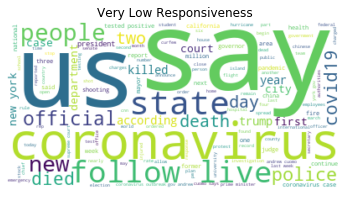

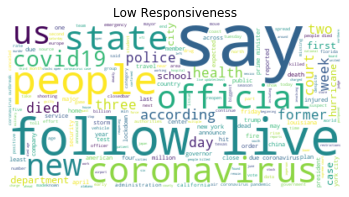

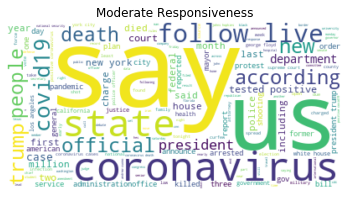

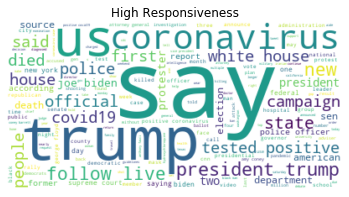

In [17]:

#very low
wordcloud = WordCloud(background_color="white").generate(low_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Very Low Responsiveness')
plt.show()

#low
wordcloud = WordCloud(background_color="white").generate(verylow_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Low Responsiveness')
plt.show()

#moderate
wordcloud = WordCloud(background_color="white").generate(moderate_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Moderate Responsiveness')
plt.show()

#high
wordcloud = WordCloud(background_color="white").generate(high_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('High Responsiveness')
plt.show()

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


Extracting the textual column

In [19]:
X_train.shape

(2248, 5)

In [20]:
X_test.shape

(563, 5)

In [21]:
trainText=X_train[['tweets_Text']]

In [22]:
testText=X_test[['tweets_Text']]


In [23]:
trainText.head()

,tweets_Text
2284,president trump fired us attorney geoffrey ber...
1089,kobe bryant fivetime nba champion fourth allti...
1355,us economy added 273000 jobs february unemploy...
2248,fbi says concluded investigation regard noose ...
461,presumptive democratic nominee joe biden calli...


In [24]:
testText.head()

,tweets_Text
2289,federal judge denied trump administrations att...
1650,us military investigating reports plane crash ...
2157,department housing urban development announced...
1488,michael avenatti found guilty federal court 3 ...
1912,herman cain former presidential candidate exce...


In [25]:
len(trainText)

2248

In [26]:
len(testText)

563

In [27]:
# each word embedding to 300 dimension
embed_size = 300
# count of vocabulary words
max_features = 50000
# length of each sentences
max_len = 70
def token_sentence(train_X, test_X ):
    #logging.info('tokenizing sentence...')
    tokenizer = Tokenizer(num_words=max_features)
    train_X_list=train_X.values.tolist()
    test_X_list=test_X.values.tolist()
    tokenizer.fit_on_texts(train_X_list)
    train_X_new = tokenizer.texts_to_sequences(train_X_list)
    test_X_new = tokenizer.texts_to_sequences(test_X_list)
    #print(test_X_new)

    train_X_new = pad_sequences(train_X_new, maxlen=max_len)
    test_X_new = pad_sequences(test_X_new, maxlen=max_len)

    return train_X_new, test_X_new, tokenizer



In [28]:
trainText_new, testText_new, tokenizer = token_sentence(trainText, testText)

Final data frames

In [29]:
#converting numpy to df

In [30]:
trainText_df=pd.DataFrame(trainText_new)

In [31]:
testText_df=pd.DataFrame(testText_new)

In [56]:
trainText_df.head()
#trainText_df.info()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [33]:
testText_df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
trainText_df.shape

(2248, 70)

In [35]:
testText_df.shape # This should be (563,70)

(563, 70)

In [36]:
#Concatnating tokenized and padded tweets into train and test--dropping original tweet

In [37]:
#X_train_df=pd.concat([X_train, trainText_df], axis=1, join='inner',sort=False)

In [38]:
#X_test_df=pd.concat([X_test, testText_df], axis=1, join='inner',sort=False)

In [39]:
#

In [52]:
######TRY APPENDING--joindoesnt work
X_train = X_train.reset_index(drop=True)
trainText = trainText.reset_index(drop=True)

In [57]:
X_test = X_test.reset_index(drop=True)
testText = testText.reset_index(drop=True)

In [53]:
X_train_df=pd.concat([X_train, trainText_df], axis=1,sort=False)

In [58]:
X_test_df=pd.concat([X_test, testText_df], axis=1, sort=False)

In [54]:
X_train_df.shape #this should be (2248, 

(2248, 75)

In [59]:
X_test_df.shape

(563, 75)

In [55]:
X_train_df.head()

,tweets_Text,tweets_Retweets,tweets_Likes,has_image,has_Link,0,1,2,3,4,...,60,61,62,63,64,65,66,67,68,69
0,president trump fired us attorney geoffrey ber...,715.0,1400.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
1,kobe bryant fivetime nba champion fourth allti...,859.0,5600.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
2,us economy added 273000 jobs february unemploy...,203.0,682.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
3,fbi says concluded investigation regard noose ...,691.0,1700.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
4,presumptive democratic nominee joe biden calli...,428.0,2900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26


In [60]:
X_test_df.head()

,tweets_Text,tweets_Retweets,tweets_Likes,has_image,has_Link,0,1,2,3,4,...,60,61,62,63,64,65,66,67,68,69
0,federal judge denied trump administrations att...,1000.0,5600.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,us military investigating reports plane crash ...,335.0,546.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,department housing urban development announced...,772.0,742.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,michael avenatti found guilty federal court 3 ...,411.0,1100.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,herman cain former presidential candidate exce...,1200.0,1500.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dropping the tweets

In [61]:
X_train_df.drop("tweets_Text", axis=1, inplace=True)
X_test_df.drop("tweets_Text", axis=1, inplace=True)

In [62]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 74 columns):
tweets_Retweets    2248 non-null float64
tweets_Likes       2248 non-null float64
has_image          2248 non-null int64
has_Link           2248 non-null int64
0                  2248 non-null int32
1                  2248 non-null int32
2                  2248 non-null int32
3                  2248 non-null int32
4                  2248 non-null int32
5                  2248 non-null int32
6                  2248 non-null int32
7                  2248 non-null int32
8                  2248 non-null int32
9                  2248 non-null int32
10                 2248 non-null int32
11                 2248 non-null int32
12                 2248 non-null int32
13                 2248 non-null int32
14                 2248 non-null int32
15                 2248 non-null int32
16                 2248 non-null int32
17                 2248 non-null int32
18                 2248 non-nul

In [63]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 74 columns):
tweets_Retweets    563 non-null float64
tweets_Likes       563 non-null float64
has_image          563 non-null int64
has_Link           563 non-null int64
0                  563 non-null int32
1                  563 non-null int32
2                  563 non-null int32
3                  563 non-null int32
4                  563 non-null int32
5                  563 non-null int32
6                  563 non-null int32
7                  563 non-null int32
8                  563 non-null int32
9                  563 non-null int32
10                 563 non-null int32
11                 563 non-null int32
12                 563 non-null int32
13                 563 non-null int32
14                 563 non-null int32
15                 563 non-null int32
16                 563 non-null int32
17                 563 non-null int32
18                 563 non-null int32
19               

Models

Decision Tree

In [65]:
clf = DecisionTreeClassifier()
clf.fit(X_train_df, y_train)
clf.score(X_test_df, y_test)

0.3108348134991119

SVM

In [66]:
clf2 = SVC()
clf2.fit(X_train_df, y_train)
clf2.score(X_test_df, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.23268206039076378